# I. First initiation

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import mutual_info_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix




## Importing dataset  

In [260]:
#Set display options to show all columns
pd.set_option('display.max_columns', None)

#Upload dataset 
df = pd.read_csv("../data/raw/dataset.csv")


In [261]:
df.head(20)


,Unnamed: 0,forecast_time_07,forecast_date_07,city_name,latitude,longtitude,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,temp_kf,humidity,probability_of_precipitation,unit_of_precipitation,value_of_precipitation,weather_main,weather_description,wind_speed,wind_deg,wind_gust,visibility,__updated_at
0,0,2024-02-08 19:00:00,2024-02-08,TP. HÀ NỘI,21.0245,105.8410,14.00,13.31,13.13,14.00,1018.0,1018.0,1017.0,0.87,71.0,0.00,3h,0.0,Clouds,mây đen u ám,3.85,30.0,6.22,10000.0,2024-02-08 18:53:32.227763
1,1,2024-02-08 22:00:00,2024-02-08,TP. HÀ NỘI,21.0245,105.8410,13.60,12.84,12.81,13.60,1019.0,1019.0,1019.0,0.79,70.0,0.00,3h,0.0,Clouds,mây đen u ám,3.04,28.0,5.60,10000.0,2024-02-08 18:53:32.227955
2,2,2024-02-08 19:00:00,2024-02-08,TỈNH BẮC KẠN,22.1333,105.8333,10.89,10.20,10.89,10.89,1019.0,1019.0,999.0,0.00,83.0,0.00,3h,0.0,Clouds,mây đen u ám,1.65,63.0,4.46,10000.0,2024-02-08 18:53:32.229873
3,3,2024-02-08 22:00:00,2024-02-08,TỈNH BẮC KẠN,22.1333,105.8333,10.74,10.04,10.45,10.74,1020.0,1020.0,1001.0,0.29,83.0,0.00,3h,0.0,Clouds,mây đen u ám,1.62,57.0,4.73,10000.0,2024-02-08 18:53:32.229873
4,4,2024-02-08 19:00:00,2024-02-08,TỈNH BẮC GIANG,21.2731,106.1947,14.01,13.29,12.34,14.01,1018.0,1018.0,1017.0,1.67,70.0,0.00,3h,0.0,Clouds,mây đen u ám,4.34,33.0,7.24,10000.0,2024-02-08 18:53:32.230857
5,5,2024-02-08 22:00:00,2024-02-08,TỈNH BẮC GIANG,21.2731,106.1947,13.43,12.63,12.26,13.43,1019.0,1019.0,1019.0,1.17,69.0,0.00,3h,0.0,Clouds,mây đen u ám,4.15,29.0,6.99,10000.0,2024-02-08 18:53:32.230857
6,6,2024-02-08 19:00:00,2024-02-08,TỈNH BẮC NINH,21.1861,106.0763,14.03,13.34,12.61,14.03,1018.0,1018.0,1017.0,1.42,71.0,0.00,3h,0.0,Clouds,mây đen u ám,4.48,28.0,7.05,10000.0,2024-02-08 18:53:32.232857
7,7,2024-02-08 22:00:00,2024-02-08,TỈNH BẮC NINH,21.1861,106.0763,13.54,12.78,12.55,13.54,1019.0,1019.0,1020.0,0.99,70.0,0.00,3h,0.0,Clouds,mây đen u ám,4.03,24.0,6.72,10000.0,2024-02-08 18:53:32.232857
8,8,2024-02-08 22:00:00,2024-02-08,TỈNH CAO BẰNG,22.6731,106.2500,10.85,10.00,10.85,10.98,1022.0,1022.0,1000.0,-0.13,77.0,0.00,3h,0.0,Clouds,mây đen u ám,0.95,54.0,2.56,10000.0,2024-02-08 18:53:32.233840
9,9,2024-02-08 19:00:00,2024-02-08,TỈNH CAO BẰNG,22.6731,106.2500,10.78,9.95,10.78,10.78,1021.0,1021.0,998.0,0.00,78.0,0.00,3h,0.0,Clouds,mây đen u ám,1.44,100.0,3.35,10000.0,2024-02-08 18:53:32.233840


In [262]:
df.shape

(120645, 25)

=> The dataset has 35901 rows and 24 columns

In [263]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120645 entries, 0 to 120644
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    120645 non-null  int64  
 1   forecast_time_07              120645 non-null  object 
 2   forecast_date_07              120645 non-null  object 
 3   city_name                     120645 non-null  object 
 4   latitude                      120645 non-null  float64
 5   longtitude                    120645 non-null  float64
 6   temp                          120645 non-null  float64
 7   feels_like                    120645 non-null  float64
 8   temp_min                      120645 non-null  float64
 9   temp_max                      120645 non-null  float64
 10  pressure                      120645 non-null  float64
 11  sea_level                     120645 non-null  float64
 12  grnd_level                    120645 non-nul

# II. Preprocess

## Cleaning dataset 

As we can see, the forecast_time_07 and forecast_date_07 do have the date in common. So now we elcreate a new column only for time observations

In [264]:
df['ftime'] = pd.to_datetime(df['forecast_time_07']).dt.time

In [265]:
df.head(20)

,Unnamed: 0,forecast_time_07,forecast_date_07,city_name,latitude,longtitude,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,temp_kf,humidity,probability_of_precipitation,unit_of_precipitation,value_of_precipitation,weather_main,weather_description,wind_speed,wind_deg,wind_gust,visibility,__updated_at,ftime
0,0,2024-02-08 19:00:00,2024-02-08,TP. HÀ NỘI,21.0245,105.8410,14.00,13.31,13.13,14.00,1018.0,1018.0,1017.0,0.87,71.0,0.00,3h,0.0,Clouds,mây đen u ám,3.85,30.0,6.22,10000.0,2024-02-08 18:53:32.227763,19:00:00
1,1,2024-02-08 22:00:00,2024-02-08,TP. HÀ NỘI,21.0245,105.8410,13.60,12.84,12.81,13.60,1019.0,1019.0,1019.0,0.79,70.0,0.00,3h,0.0,Clouds,mây đen u ám,3.04,28.0,5.60,10000.0,2024-02-08 18:53:32.227955,22:00:00
2,2,2024-02-08 19:00:00,2024-02-08,TỈNH BẮC KẠN,22.1333,105.8333,10.89,10.20,10.89,10.89,1019.0,1019.0,999.0,0.00,83.0,0.00,3h,0.0,Clouds,mây đen u ám,1.65,63.0,4.46,10000.0,2024-02-08 18:53:32.229873,19:00:00
3,3,2024-02-08 22:00:00,2024-02-08,TỈNH BẮC KẠN,22.1333,105.8333,10.74,10.04,10.45,10.74,1020.0,1020.0,1001.0,0.29,83.0,0.00,3h,0.0,Clouds,mây đen u ám,1.62,57.0,4.73,10000.0,2024-02-08 18:53:32.229873,22:00:00
4,4,2024-02-08 19:00:00,2024-02-08,TỈNH BẮC GIANG,21.2731,106.1947,14.01,13.29,12.34,14.01,1018.0,1018.0,1017.0,1.67,70.0,0.00,3h,0.0,Clouds,mây đen u ám,4.34,33.0,7.24,10000.0,2024-02-08 18:53:32.230857,19:00:00
5,5,2024-02-08 22:00:00,2024-02-08,TỈNH BẮC GIANG,21.2731,106.1947,13.43,12.63,12.26,13.43,1019.0,1019.0,1019.0,1.17,69.0,0.00,3h,0.0,Clouds,mây đen u ám,4.15,29.0,6.99,10000.0,2024-02-08 18:53:32.230857,22:00:00
6,6,2024-02-08 19:00:00,2024-02-08,TỈNH BẮC NINH,21.1861,106.0763,14.03,13.34,12.61,14.03,1018.0,1018.0,1017.0,1.42,71.0,0.00,3h,0.0,Clouds,mây đen u ám,4.48,28.0,7.05,10000.0,2024-02-08 18:53:32.232857,19:00:00
7,7,2024-02-08 22:00:00,2024-02-08,TỈNH BẮC NINH,21.1861,106.0763,13.54,12.78,12.55,13.54,1019.0,1019.0,1020.0,0.99,70.0,0.00,3h,0.0,Clouds,mây đen u ám,4.03,24.0,6.72,10000.0,2024-02-08 18:53:32.232857,22:00:00
8,8,2024-02-08 22:00:00,2024-02-08,TỈNH CAO BẰNG,22.6731,106.2500,10.85,10.00,10.85,10.98,1022.0,1022.0,1000.0,-0.13,77.0,0.00,3h,0.0,Clouds,mây đen u ám,0.95,54.0,2.56,10000.0,2024-02-08 18:53:32.233840,22:00:00
9,9,2024-02-08 19:00:00,2024-02-08,TỈNH CAO BẰNG,22.6731,106.2500,10.78,9.95,10.78,10.78,1021.0,1021.0,998.0,0.00,78.0,0.00,3h,0.0,Clouds,mây đen u ám,1.44,100.0,3.35,10000.0,2024-02-08 18:53:32.233840,19:00:00


## Labeling output 

We can see in dataset that the weather_main shows 3 results of weather which are: clouds, clear and rain. Thus, we can use this column to display output label for model. 

Because weather_main has object datatype, so we need to convert it into numerical values by using Label Encoding  

In [266]:
#Labeling output data  
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['weather_main_encoded'] = label_encoder.fit_transform(df['weather_main'])

#Inspecting labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:")
print(label_mapping)



Label mapping:
{'Clear': 0, 'Clouds': 1, 'Rain': 2}


## Reducing reduntdant columns

Also we need to eliminate some redundant features to ensure that our model works properly. By exprience we can show that weather_description and visibility have nothing efffects on our model. So let's drop those columns. Consider that the unit_of_precipitation data only indicates the measured-period time for precipitation. So we can drop this column due to its low impact on our model. 

In [267]:
# Drop the redundant columns
redundant_columns = ['weather_description', 'visibility', 'unit_of_precipitation']
df_reduced = df.drop(columns=redundant_columns)

After that, we need to reformat the time and date in columns 'forecast_time_07', 'forecast_date_07'.

In [268]:
df['forecast_time_07'] = pd.to_datetime(df['forecast_time_07'])
df['forecast_date_07'] = pd.to_datetime(df['forecast_date_07'])


## Handling missing values

Now we come to next stage, identifying missing data.

In [269]:
#Identify missing values
missing_data = df.isnull().sum()
print("Missing values in each column: ")
print(missing_data)

#Percentage of missing values
missing_data_percent = (df.isnull().sum() / len(df))*100
print("Percentage of missing values in each column: ")
print(missing_data_percent)

Missing values in each column: 
Unnamed: 0                      0
forecast_time_07                0
forecast_date_07                0
city_name                       0
latitude                        0
longtitude                      0
temp                            0
feels_like                      0
temp_min                        0
temp_max                        0
pressure                        0
sea_level                       0
grnd_level                      0
temp_kf                         0
humidity                        0
probability_of_precipitation    0
unit_of_precipitation           0
value_of_precipitation          0
weather_main                    0
weather_description             0
wind_speed                      0
wind_deg                        0
wind_gust                       0
visibility                      0
__updated_at                    0
ftime                           0
weather_main_encoded            0
dtype: int64
Percentage of missing values in each 

Retriving the result that there are no missing values in our dataset, we move to the next step.

# Exploratory Data Analysis

## Visualizing data

### Overview histograms 

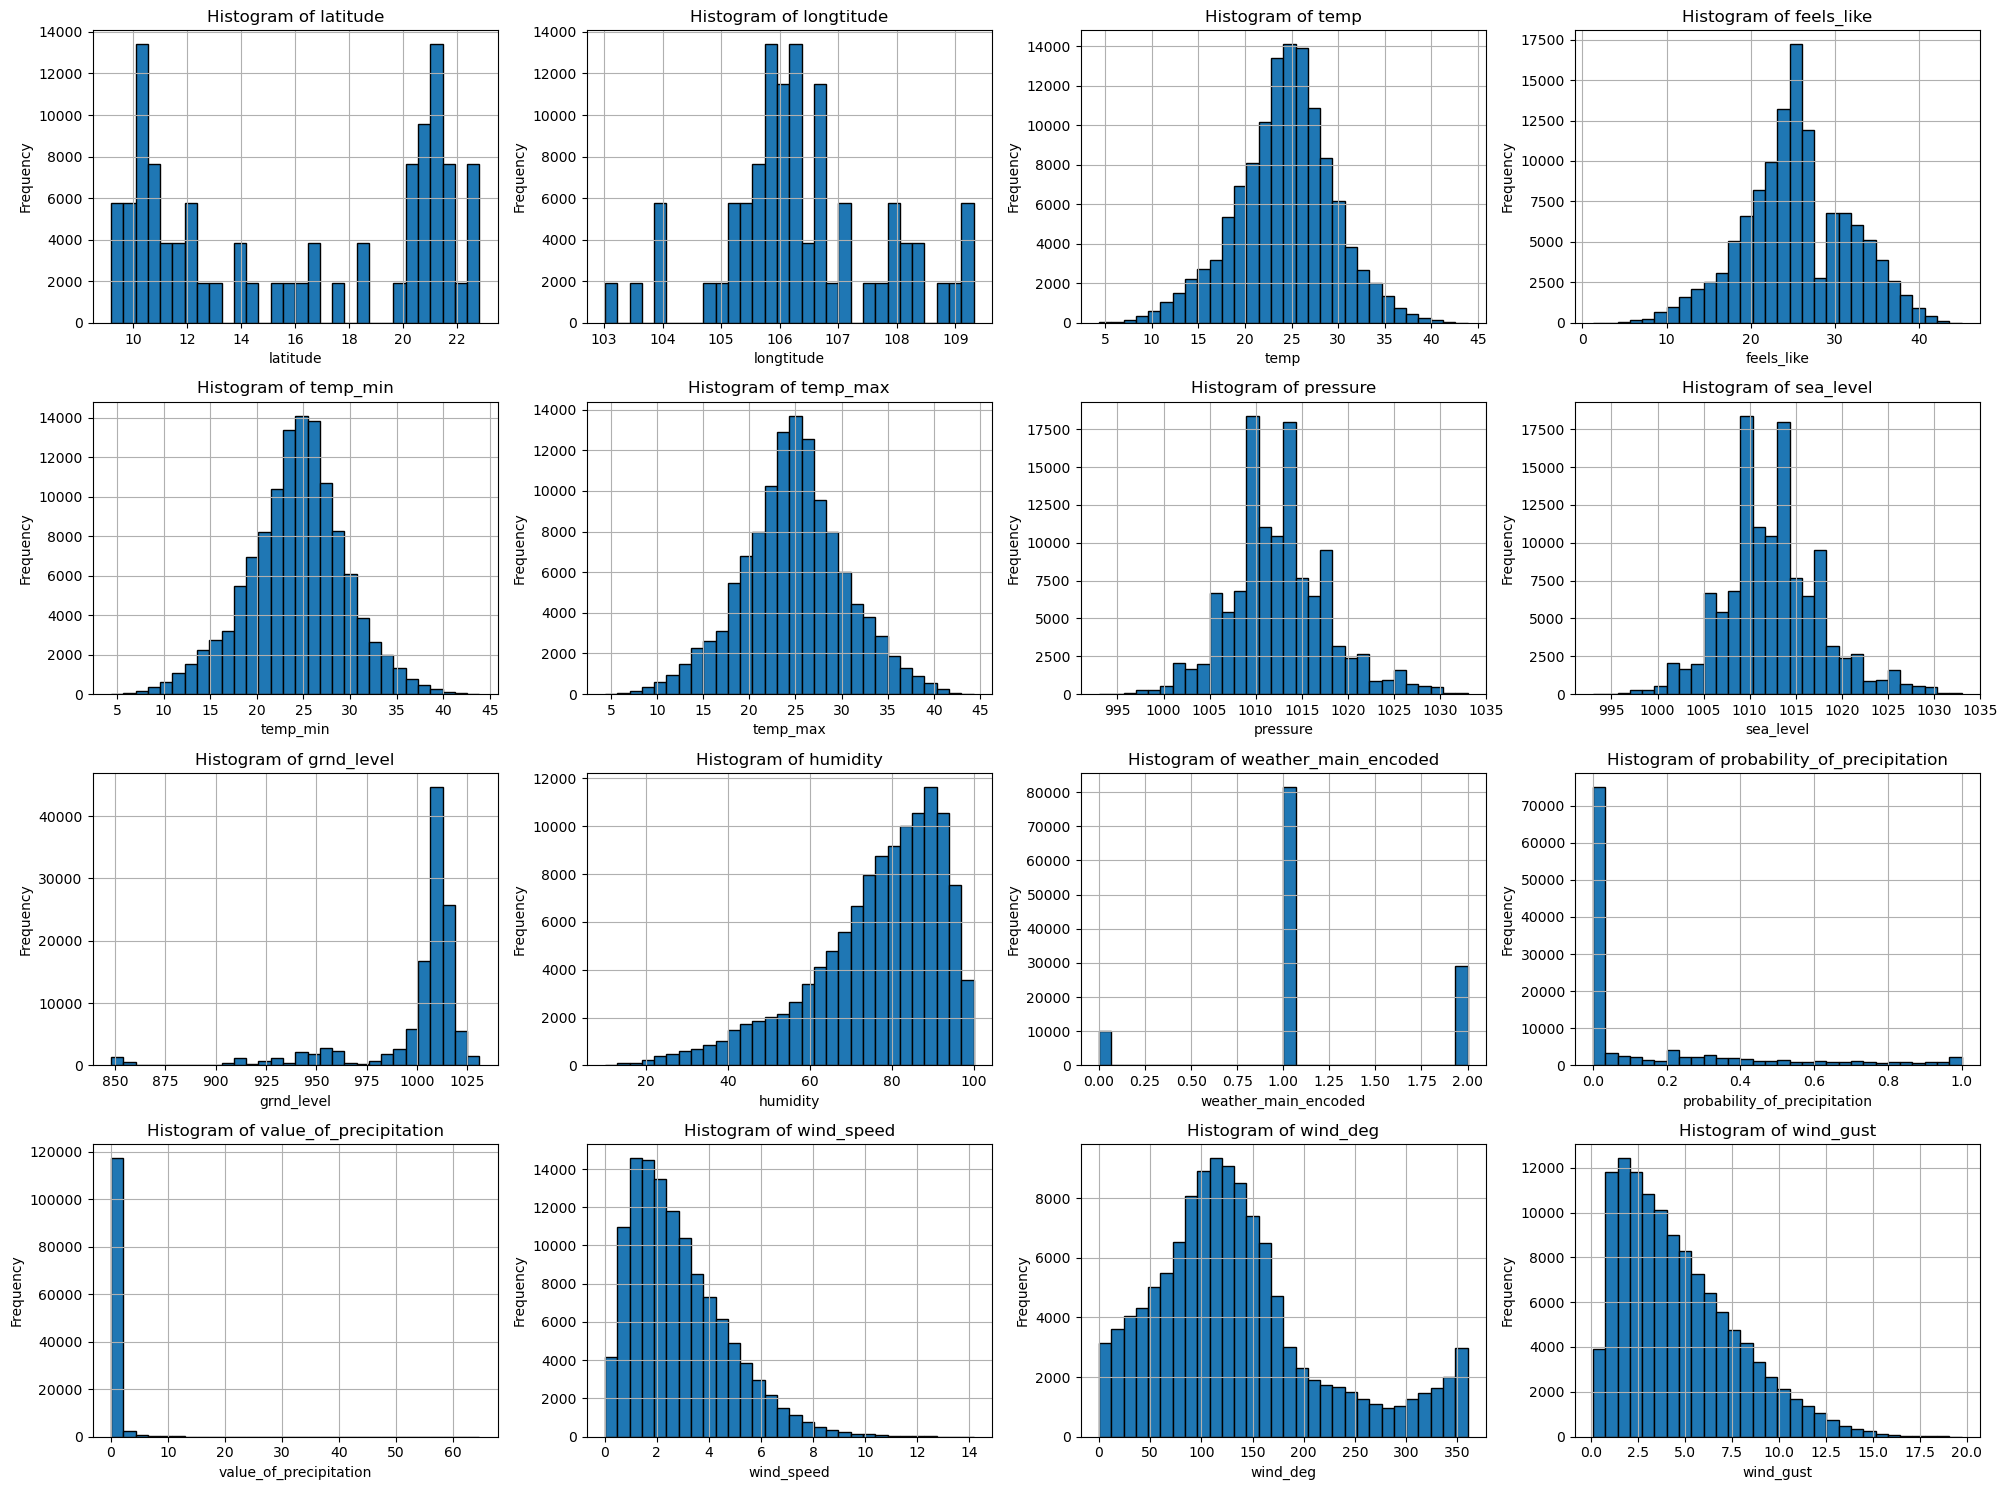

In [270]:
numerical_columns = ['latitude', 'longtitude', 'temp', 'feels_like', 'temp_min', 'temp_max', 
                     'pressure', 'sea_level', 'grnd_level', 'humidity', 'weather_main_encoded',
                     'probability_of_precipitation', 'value_of_precipitation', 
                     'wind_speed', 'wind_deg', 'wind_gust']

#Creating histograms
plt.figure(figsize=(20,15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    df[column].hist(bins = 30, edgecolor = 'black')
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Data relevance

### Observation time 

In [271]:
#convert datetime
df['forecast_time_07'] = pd.to_datetime(df['forecast_time_07'])
df['forecast_date_07'] = pd.to_datetime(df['forecast_date_07'])
df['hour'] = df['forecast_time_07'].dt.strftime("%H").apply(lambda x: int(x))

In [272]:
# Convert 'ftime' column in your DataFrame to datetime.time objects if it's not already
df['ftime'] = pd.to_datetime(df['forecast_time_07']).dt.time

# Expected forecast times
expected_times = [
    '00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
    '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00',
    '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00',
    '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00',
    '20:00:00', '21:00:00', '22:00:00', '23:00:00'
]

# Convert expected times to datetime.time objects
expected_times = [pd.to_datetime(time).time() for time in expected_times]

# Create a DataFrame with expected times
expected_df = pd.DataFrame(expected_times, columns=['ftime'])

# Count the number of observations for each time
count_time = df['ftime'].value_counts().sort_index()


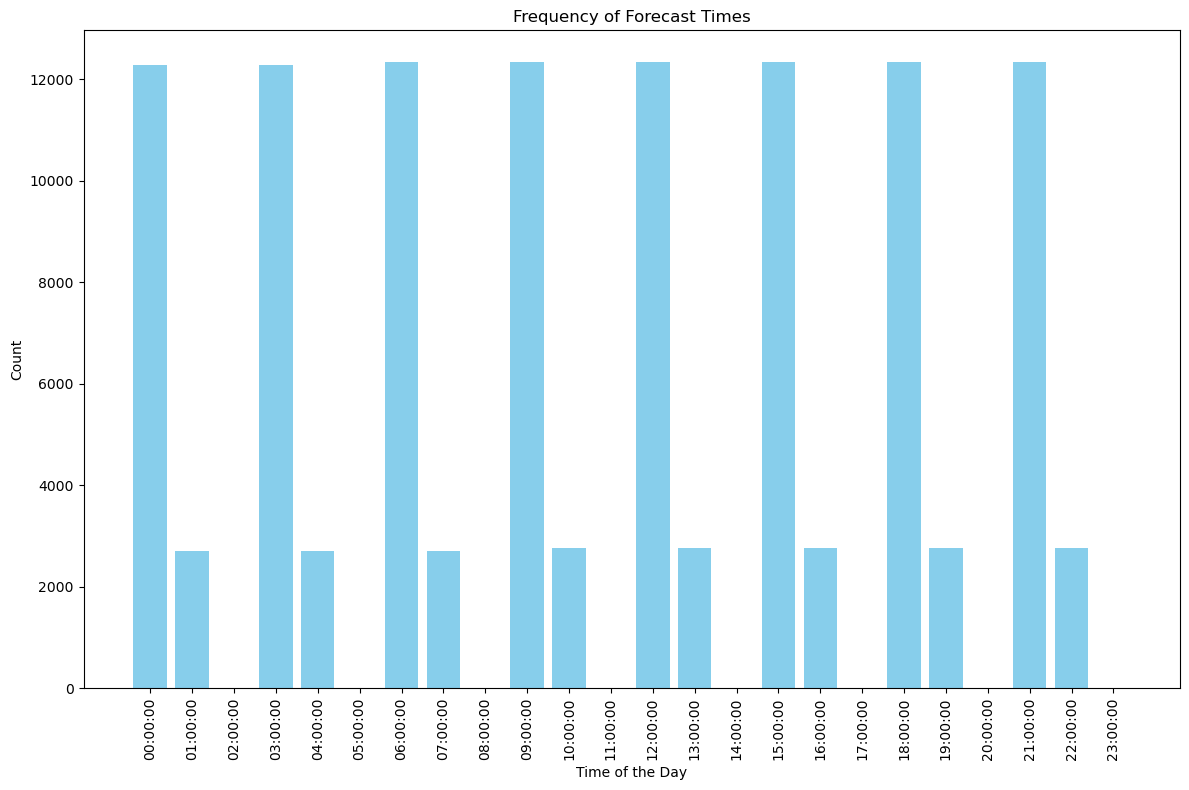

In [273]:

# Create a DataFrame for counts
count_df = pd.DataFrame(count_time).reset_index()
count_df.columns = ['ftime', 'count']

# Merge with expected times to include missing times
merged_df = expected_df.merge(count_df, on='ftime', how='left').fillna(0)

# Plot the frequency of each forecast time
plt.figure(figsize=(12, 8))
plt.bar(merged_df['ftime'].astype(str), merged_df['count'], color='skyblue')
plt.title('Frequency of Forecast Times')
plt.xlabel('Time of the Day')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The plot reveals that the dataset lacks observations in specific times, notably 2:00, 5:00, 8:00, 11:00, 14:00, 17:00, 20:00, 23:00. Which suggests the way data is colleted. However, looking into the number of observations in each time, we can see that the dataset has a good variation in every other time.

### Location observations

In [274]:
# Count the occurrences of each location
location_counts = df['city_name'].value_counts()

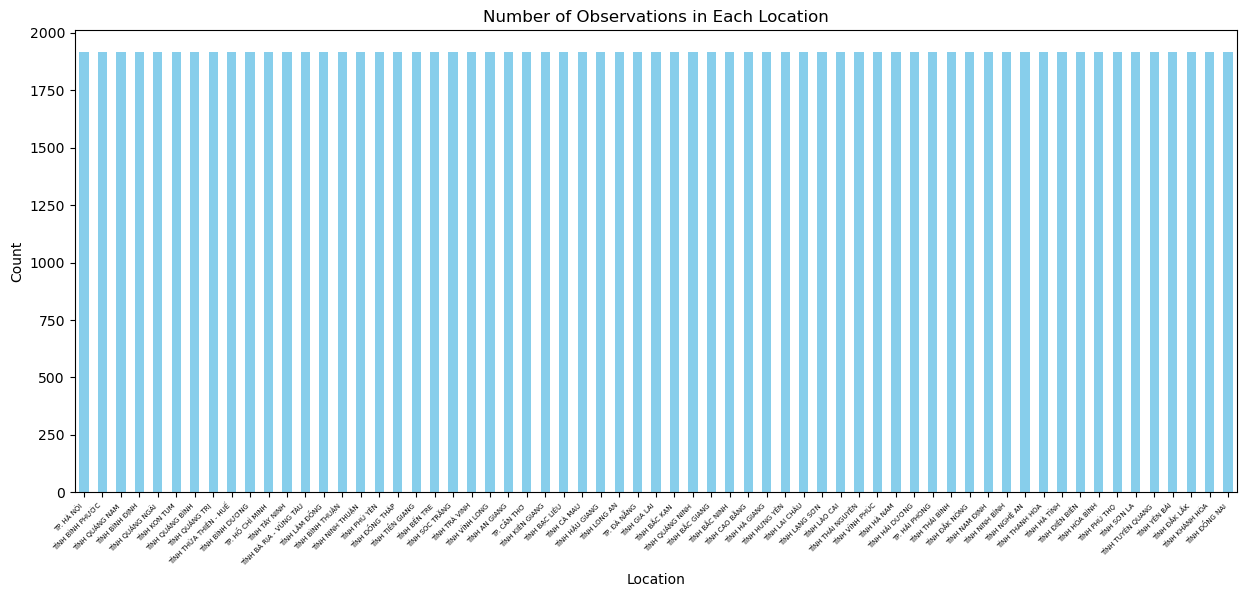

In [275]:
# Plot the number of observations in each location
plt.figure(figsize=(15, 6))
location_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Observations in Each Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', fontsize = 5 )
plt.show()

### Multiple features data relevances

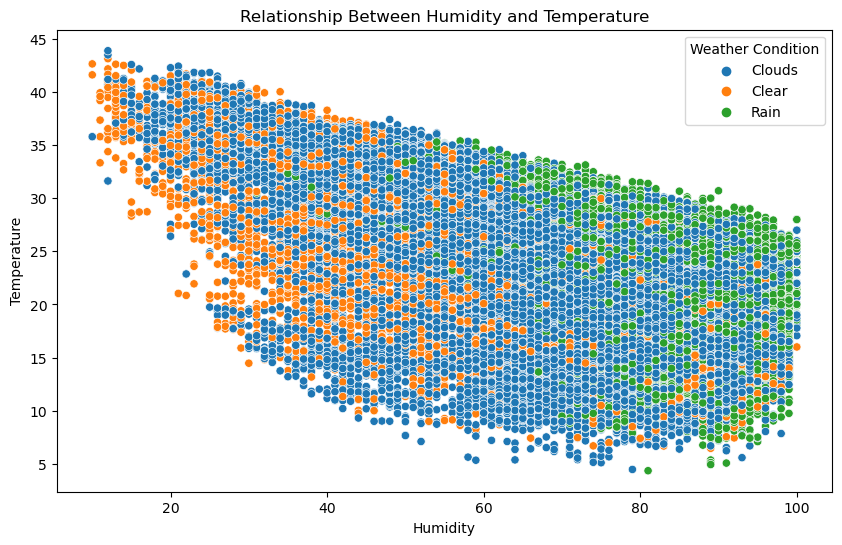

In [276]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='humidity', y='temp', hue='weather_main', data=df)
plt.title('Relationship Between Humidity and Temperature')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.legend(title='Weather Condition')
plt.show()


Correlation matrix 

In [277]:
df['forecast_time_07'] = pd.to_datetime(df['forecast_time_07'])
df['forecast_date_07'] = pd.to_datetime(df['forecast_date_07'])
df['hour'] = df['forecast_time_07'].dt.strftime("%H").apply(lambda x: int(x))


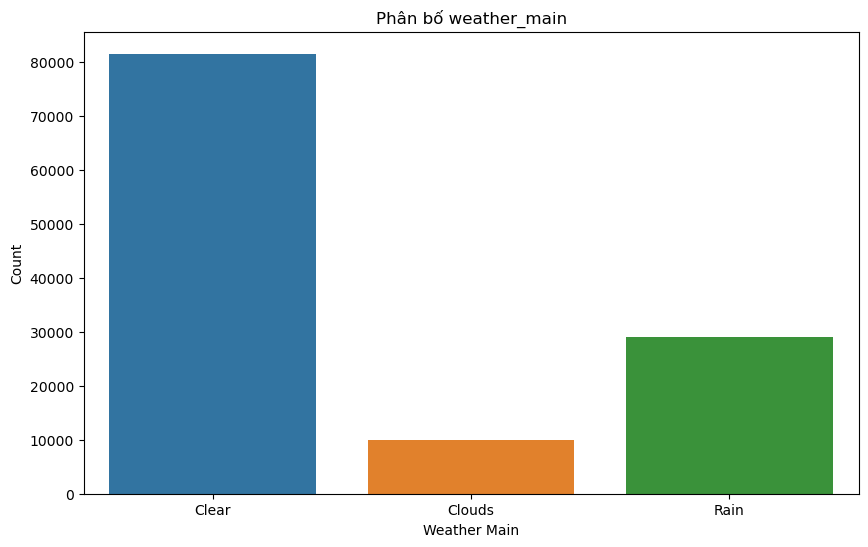

In [278]:
plt.figure(figsize=(10, 6))
sns.countplot(x='weather_main', data=df)
plt.title('Phân bố weather_main')
plt.xlabel('Weather Main')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=label_encoder.classes_)
plt.show()

                              Unnamed: 0      latitude    longtitude  \
Unnamed: 0                      1.000000  3.520426e-03 -1.603073e-01   
latitude                        0.003520  1.000000e+00 -3.560996e-01   
longtitude                     -0.160307 -3.560996e-01  1.000000e+00   
temp                            0.057138 -4.701113e-01  5.412960e-02   
feels_like                      0.079461 -4.607867e-01  5.578982e-02   
temp_min                        0.058998 -4.684516e-01  5.302986e-02   
temp_max                        0.077717 -4.562480e-01  4.476863e-02   
pressure                       -0.100849  2.501041e-01  4.679911e-03   
sea_level                      -0.100849  2.501041e-01  4.679911e-03   
grnd_level                      0.084606 -1.703404e-02 -6.965425e-03   
temp_kf                        -0.109846  7.482226e-02  2.725796e-02   
humidity                        0.038365  2.253139e-01  1.055787e-01   
probability_of_precipitation    0.036910  1.682769e-01 -6.587328

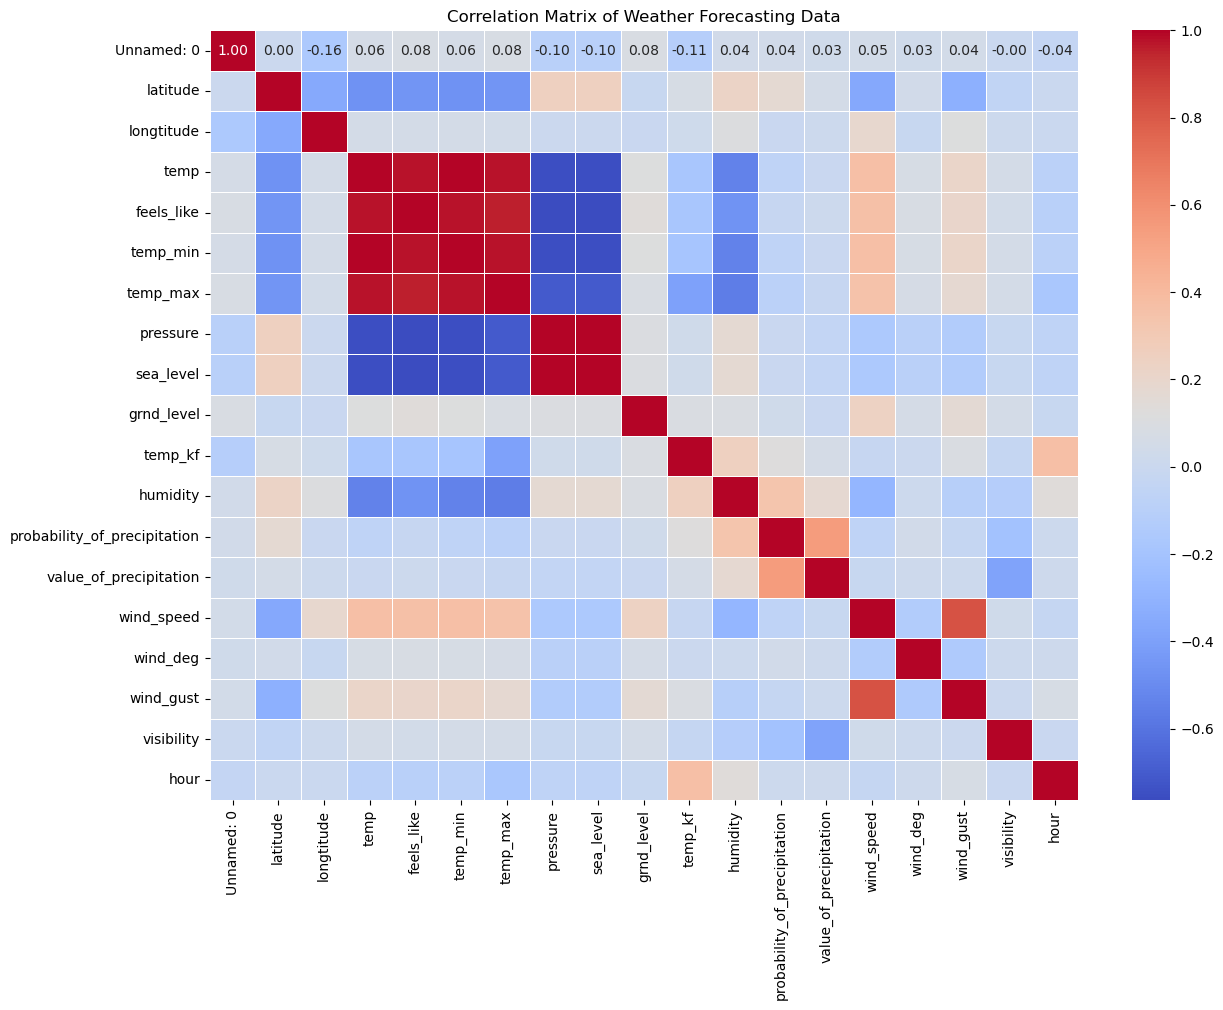

In [279]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Print the correlation matrix to verify its content
print(corr_matrix)

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Weather Forecasting Data')
plt.show()

Variable Selection:

Select variables that have a high correlation with weather_main.
temp, temp_min, and temp_max have correlations close to 1 with each other, so choose one representative variable: feels_like.
pressure and sea_level have a correlation of 1, so choose sea_level as the representative variable.
value_of_precipitation and probability_of_precipitation represent the probability and amount of precipitation respectively, so choose the probability of precipitation.
This approach helps in reducing multicollinearity by selecting representative variables with high correlation, thereby simplifying the model while retaining relevant information.


# III. Models

In [280]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

## SVM

In [337]:

df_reduced['hour'] = df_reduced['forecast_time_07'].dt.strftime("%H").apply(lambda x: int(x))

AttributeError: Can only use .dt accessor with datetimelike values

## LSTM

## XGBoost

In [304]:
features = ['latitude', 'longtitude', 'temp','value_of_precipitation', 'sea_level', 'humidity', 'wind_speed', 'wind_deg', 'wind_gust','weather_main_encoded' ]



In [305]:
df=df_reduced[features]
df

,latitude,longtitude,temp,value_of_precipitation,sea_level,humidity,wind_speed,wind_deg,wind_gust,weather_main_encoded
0,21.0245,105.8410,14.00,0.00,1018.0,71.0,3.85,30.0,6.22,1
1,21.0245,105.8410,13.60,0.00,1019.0,70.0,3.04,28.0,5.60,1
2,22.1333,105.8333,10.89,0.00,1019.0,83.0,1.65,63.0,4.46,1
3,22.1333,105.8333,10.74,0.00,1020.0,83.0,1.62,57.0,4.73,1
4,21.2731,106.1947,14.01,0.00,1018.0,70.0,4.34,33.0,7.24,1
...,...,...,...,...,...,...,...,...,...,...
120640,20.9411,106.3331,25.53,0.00,1013.0,58.0,6.96,133.0,7.28,1
120641,20.9411,106.3331,21.39,0.00,1014.0,81.0,5.75,126.0,10.00,1
120642,20.9411,106.3331,20.82,0.00,1015.0,85.0,4.90,123.0,10.39,1
120643,20.9411,106.3331,20.92,0.22,1014.0,84.0,4.69,113.0,8.85,2


In [306]:
X=df.drop(columns=['weather_main_encoded'])
y=df['weather_main_encoded']

In [307]:
X

,latitude,longtitude,temp,value_of_precipitation,sea_level,humidity,wind_speed,wind_deg,wind_gust
0,21.0245,105.8410,14.00,0.00,1018.0,71.0,3.85,30.0,6.22
1,21.0245,105.8410,13.60,0.00,1019.0,70.0,3.04,28.0,5.60
2,22.1333,105.8333,10.89,0.00,1019.0,83.0,1.65,63.0,4.46
3,22.1333,105.8333,10.74,0.00,1020.0,83.0,1.62,57.0,4.73
4,21.2731,106.1947,14.01,0.00,1018.0,70.0,4.34,33.0,7.24
...,...,...,...,...,...,...,...,...,...
120640,20.9411,106.3331,25.53,0.00,1013.0,58.0,6.96,133.0,7.28
120641,20.9411,106.3331,21.39,0.00,1014.0,81.0,5.75,126.0,10.00
120642,20.9411,106.3331,20.82,0.00,1015.0,85.0,4.90,123.0,10.39
120643,20.9411,106.3331,20.92,0.22,1014.0,84.0,4.69,113.0,8.85


In [308]:
y

0         1
1         1
2         1
3         1
4         1
         ..
120640    1
120641    1
120642    1
120643    2
120644    2
Name: weather_main_encoded, Length: 120645, dtype: int32

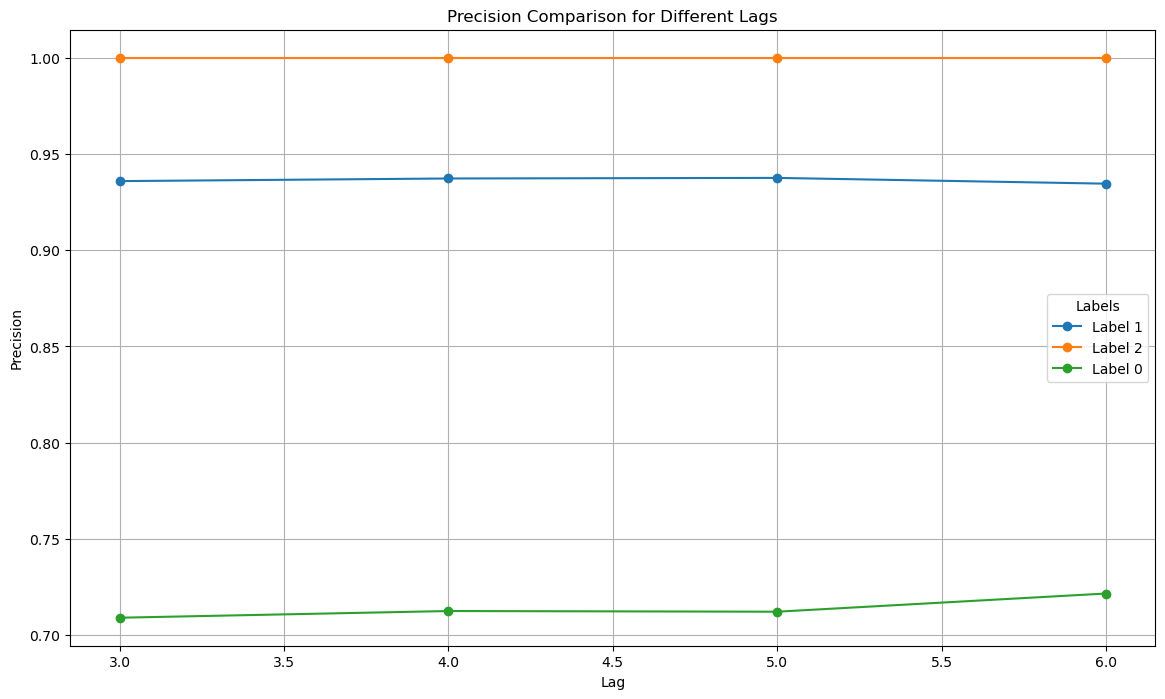

In [372]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Function to create lagged features
def create_lagged_features(df, target_column, lags):
    for lag in range(1, lags + 1):
        df[f'{target_column}_lag_{lag}'] = df[target_column].shift(lag)
    df = df.dropna()  # Drop rows with NaN values
    return df

# Range of lags to test
min_lag = 3
max_lag = 6

# Dictionary to store precision results
precision_results = {label: [] for label in df['weather_main_encoded'].unique()}

# Loop over each lag value
for lag in range(min_lag, max_lag + 1):
    # Create lagged features
    df_lagged = create_lagged_features(df.copy(), 'weather_main_encoded', lag)
    X = df_lagged.drop(columns=['weather_main_encoded'])
    y = df_lagged['weather_main_encoded']
    
    # Normalize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=False)
    
    # Train the XGBoost classifier
    model = XGBClassifier(eval_metric='mlogloss', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate precision for each label
    precision = precision_score(y_test, y_pred, average=None, labels=np.unique(y_test))
    
    # Store precision results
    for idx, label in enumerate(np.unique(y_test)):
        precision_results[label].append(precision[idx])

# Step 2: Plot the precision results
plt.figure(figsize=(14, 8))
for label, precisions in precision_results.items():
    plt.plot(range(min_lag, max_lag + 1), precisions, marker='o', linestyle='-', label=f'Label {label}')

plt.xlabel('Lag')
plt.ylabel('Precision')
plt.title('Precision Comparison for Different Lags')
plt.legend(title='Labels')
plt.grid(True)
plt.show()



In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report


In [348]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, TimeSeriesSplit

#Prepare the data
def create_lagged_features(df, target_column, lags):
    for lag in range(1, lags + 1):
        df[f'{target_column}_lag_{lag}'] = df[target_column].shift(lag)
    df = df.dropna()  # Drop rows with NaN values
    return df

lags = 3  # Number of lagged features
df = create_lagged_features(df, 'weather_main_encoded', lags)

X = df.drop(columns=['weather_main_encoded'])
y = df['weather_main_encoded']

#Split the data into training and testing sets using TimeSeriesSplit for time series data
tscv = TimeSeriesSplit(n_splits=5)


In [349]:
# Store results for multiple splits
results = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = XGBRegressor(eval_metric='rmse', random_state=42)
    model.fit(X_train, y_train)

# Make predictions on the testing set
    y_pred = model.predict(X_test)

# Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'MSE': mse, 'MAE': mae, 'R2': r2})
    print(f"Split {len(results)} - Mean Squared Error: {mse}, Mean Absolute Error: {mae}, R2 Score: {r2}")



Split 1 - Mean Squared Error: 0.06263717787199571, Mean Absolute Error: 0.11066896201656691, R2 Score: 0.7838011559661013
Split 2 - Mean Squared Error: 0.05362424194217542, Mean Absolute Error: 0.09345644828056804, R2 Score: 0.8317668012537429
Split 3 - Mean Squared Error: 0.04862959603901638, Mean Absolute Error: 0.09115215000100668, R2 Score: 0.8435399042935032
Split 4 - Mean Squared Error: 0.04885727509853491, Mean Absolute Error: 0.08891266790938447, R2 Score: 0.8564578324313338
Split 5 - Mean Squared Error: 0.04660625400615081, Mean Absolute Error: 0.08781881231563901, R2 Score: 0.833396578690132


In [350]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())

# Summary of results
average_mse = np.mean([result['MSE'] for result in results])
average_mae = np.mean([result['MAE'] for result in results])
average_r2 = np.mean([result['R2'] for result in results])

print(f"\nAverage Mean Squared Error: {average_mse}")
print(f"Average Mean Absolute Error: {average_mae}")
print(f"Average R2 Score: {average_r2}")


        Actual  Predicted
100541       1   0.984571
100542       1   0.967139
100543       1   0.959160
100544       1   0.966717
100545       1   0.945715

Average Mean Squared Error: 0.05207090899157464
Average Mean Absolute Error: 0.09440180810463301
Average R2 Score: 0.8297924545269627


In [351]:
#Calculate custom accuracy
threshold = 0.5
accuracy = np.mean(np.abs(y_test - y_pred) <= threshold)
print("Custom Accuracy (within ±0.5 units):", accuracy)

Custom Accuracy (within ±0.5 units): 0.9419021090330283


## Random Forest

## Decision Tree

In [327]:
from sklearn.datasets import  load_iris
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split

In [328]:
x, y = load_iris(return_X_y=True)
iris = load_iris()

In [329]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [330]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [331]:
predicted = clf.predict(x_test)
print(metrics.classification_report(y_test, predicted))
# test
# danh gia hieu suat mo hinh

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      0.90      0.90        10
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



In [334]:
!pip install graphviz

In [335]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, class_names=iris.target_names,
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph
# bieu do phan tich mo hinh

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH